In [1]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
from tqdm import trange

In [2]:
base_url = "https://www.inflearn.com/pages/newyear-event-20200102"
response = requests.get(base_url)
soup = bs(response.text,'html.parser')

In [3]:
content = soup.select("#main > section > div > div > div.chitchats > div.chitchat-list > div")
content[-1]

<div class="chitchat-item">
<figure class="image is-48x48">
<img alt="인프런" class="user_thumb is-rounded" src="https://cdn.inflearn.com/wp-content/uploads/avatars/17/b415d9fa24d186c4adf22ca9a49116b5-bpfull.png"/>
</figure>
<div class="content">
<div class="author">
<span class="author_name">인프런</span>
<time class="created_at" datetime="Sun Dec 29 2019 17:59:00 GMT+0900 (GMT+09:00)">⋅ 6개월 전</time>
<a class="update-chitchat edit-chitchat is-hidden" data-id="18594" type="button">저장</a>
<a class="hidden-editor edit-chitchat is-hidden" type="button">취소</a>
<a class="edit-chitchat no_cmt_reply" type="button">답글달기</a>
</div>
<div class="body edit-chitchat">인프런 0호 팀원이에요!
그동안 서비스 개발 때문에 js 를 많이 했었는데 앞으론 통계나 분석을 많이 하고 싶어서 파이썬을 공부하고 싶어요! 올해 파이썬 마스터가 되는걸로..
#관심강의: 남박사의 파이썬 활용</div>
<textarea class="textarea edit-chitchat is-hidden"></textarea>
<div class="summary_comments">
</div>
<div class="chitchats_and_editor is-hidden">
<div class="chitchat-comment-list">
</div>
<div class="cmt-editor">
<div c

In [4]:
chitchat = content[-1].select("div.body.edit-chitchat")[0].get_text(strip=True)
chitchat

'인프런 0호 팀원이에요!\n그동안 서비스 개발 때문에 js 를 많이 했었는데 앞으론 통계나 분석을 많이 하고 싶어서 파이썬을 공부하고 싶어요! 올해 파이썬 마스터가 되는걸로..\n#관심강의: 남박사의 파이썬 활용'

In [5]:
events = []
for i in range(5):
    print("-"*20)
    chitchat = content[i].select("div.body.edit-chitchat")[0].get_text(strip=True)
    print(chitchat)
    events.append(chitchat)

--------------------
2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!
관심 있는 강의 : 스프링 웹 MVC
--------------------
2020년 목표: C++ 열심히 공부해서, 학교에서 꼭 A 맞기..!! 
관심있는 강의: 따배씨 C++
--------------------
2020년 목표 : 리액트 공부하기
--------------------
40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급
--------------------
2020년 목표 : 돌머리 비전공자가 멋진 전공자 되기!


In [6]:
content_count = len(content)
content_count

2447

In [7]:
events = []
for i in trange(content_count):
    chitchat = content[i].select("div.body.edit-chitchat")[0].get_text(strip=True)
    events.append(chitchat)

100%|████████████████████████████████████████████████████████████████████████████| 2447/2447 [00:01<00:00, 1404.77it/s]


In [8]:
events[:5]

['2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 강의 : 스프링 웹 MVC',
 '2020년 목표: C++ 열심히 공부해서, 학교에서 꼭 A 맞기..!! \n관심있는 강의: 따배씨 C++',
 '2020년 목표 : 리액트 공부하기',
 '40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급',
 '2020년 목표 : 돌머리 비전공자가 멋진 전공자 되기!']

In [9]:
pd.DataFrame( { "text": events } )

,text
0,2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...
1,"2020년 목표: C++ 열심히 공부해서, 학교에서 꼭 A 맞기..!! \n관심있는..."
2,2020년 목표 : 리액트 공부하기
3,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급
4,2020년 목표 : 돌머리 비전공자가 멋진 전공자 되기!
...,...
2442,"작년 한해도 일이 바쁘다, 야근해서 힘들다는 핑계로 김영한님의 JPA 강의를 또 스..."
2443,저는 졸업을 1년 남기고 있는 컴퓨터공학과 학생입니다. 졸업 프로젝트로 웹/앱 개발...
2444,"에프터 이펙트를 써본 적은 있는데, 매번 기초만 배우다 말았어요. 이걸 할 줄 안다..."
2445,저번에 인프런에서 페이스북 마케팅 강의를 듣고 많은 도움을 받았습니다. 마케팅 업무...


In [10]:
df = pd.DataFrame( { "text": events } )
df.shape

(2447, 1)

In [11]:
df.to_csv("inflearn-event.csv", index=False)

In [12]:
pd.read_csv("inflearn-event.csv").head()

,text
0,2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...
1,"2020년 목표: C++ 열심히 공부해서, 학교에서 꼭 A 맞기..!! \n관심있는..."
2,2020년 목표 : 리액트 공부하기
3,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급
4,2020년 목표 : 돌머리 비전공자가 멋진 전공자 되기!


In [13]:
import numpy as np
import re
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [14]:
#Window
plt.rc("font", family="Malgun Gothic")
#macOS
#plt.rc("font", family="AppleGothic")
#plt.rc("axes", unicode_minus=False)

In [15]:
df = pd.read_csv("inflearn-event.csv")
df.shape

(2447, 1)

In [16]:
df.head()

,text
0,2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...
1,"2020년 목표: C++ 열심히 공부해서, 학교에서 꼭 A 맞기..!! \n관심있는..."
2,2020년 목표 : 리액트 공부하기
3,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급
4,2020년 목표 : 돌머리 비전공자가 멋진 전공자 되기!


In [17]:
df.tail()

,text
2442,"작년 한해도 일이 바쁘다, 야근해서 힘들다는 핑계로 김영한님의 JPA 강의를 또 스..."
2443,저는 졸업을 1년 남기고 있는 컴퓨터공학과 학생입니다. 졸업 프로젝트로 웹/앱 개발...
2444,"에프터 이펙트를 써본 적은 있는데, 매번 기초만 배우다 말았어요. 이걸 할 줄 안다..."
2445,저번에 인프런에서 페이스북 마케팅 강의를 듣고 많은 도움을 받았습니다. 마케팅 업무...
2446,인프런 0호 팀원이에요!\n그동안 서비스 개발 때문에 js 를 많이 했었는데 앞으론...


In [18]:
print(df.shape)
df = df.drop_duplicates(["text"], keep="last")
print(df.shape)

(2447, 1)
(2409, 1)


In [19]:
df["origin_text"] = df["text"]
df.head()

,text,origin_text
0,2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...,2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...
1,"2020년 목표: C++ 열심히 공부해서, 학교에서 꼭 A 맞기..!! \n관심있는...","2020년 목표: C++ 열심히 공부해서, 학교에서 꼭 A 맞기..!! \n관심있는..."
3,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급
4,2020년 목표 : 돌머리 비전공자가 멋진 전공자 되기!,2020년 목표 : 돌머리 비전공자가 멋진 전공자 되기!
5,2020 년목표: 비전공자(경영)가 전공자(it) 되기!!!,2020 년목표: 비전공자(경영)가 전공자(it) 되기!!!


In [20]:
df["text"] = df["text"].str.lower()

In [21]:
df["text"] = df["text"].str.replace(
    "python", "파이썬").str.replace(
    "pandas", "판다스").str.replace(
    "javascript", "자바스크립트").str.replace(
    "java", "자바").str.replace(
    "react", "리액트")

In [22]:
df["course"] = df["text"].apply(lambda x: x.split("관심강의")[-1])
df["course"] = df["course"].apply(lambda x: x.split("관심 강의")[-1])
df["course"] = df["course"].apply(lambda x: x.split("관심 강좌")[-1])
df["course"] = df["course"].str.replace(":", "")
df["course"].head()

0    2020년 목표 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 강...
1    2020년 목표 c++ 열심히 공부해서, 학교에서 꼭 a 맞기..!! \n관심있는 ...
3                  40대 프로그래밍 시작!  우리를 위한 프로그래밍  파이썬 중급
4                       2020년 목표  돌머리 비전공자가 멋진 전공자 되기!
5                     2020 년목표 비전공자(경영)가 전공자(it) 되기!!!
Name: course, dtype: object

In [23]:
df[["text","course"]].tail()

,text,course
2442,"작년 한해도 일이 바쁘다, 야근해서 힘들다는 핑계로 김영한님의 jpa 강의를 또 스...",스프링 데이터 jpa
2443,저는 졸업을 1년 남기고 있는 컴퓨터공학과 학생입니다. 졸업 프로젝트로 웹/앱 개발...,스프링 부트 개념과 활용
2444,"에프터 이펙트를 써본 적은 있는데, 매번 기초만 배우다 말았어요. 이걸 할 줄 안다...",에펙 초보자도 만들 수 있는 유튜브 인트로 에프터이펙트 강좌
2445,저번에 인프런에서 페이스북 마케팅 강의를 듣고 많은 도움을 받았습니다. 마케팅 업무...,파이썬 입문 및 웹 크롤링을 활용한 다양한 자동화 어플리케이션 제작하기
2446,인프런 0호 팀원이에요!\n그동안 서비스 개발 때문에 js 를 많이 했었는데 앞으론...,남박사의 파이썬 활용


In [24]:
search_keyword = ['머신러닝', '딥러닝', '파이썬', '판다스', '공공데이터',
    'django', '크롤링', '시각화', '데이터분석', '웹개발', '엑셀', 'c',
    '자바', '자바스크립트', 'node', 'vue', '리액트']
for keyword in search_keyword:
    df[keyword] = df["course"].str.contains(keyword)
df.head()

,text,origin_text,course,머신러닝,딥러닝,파이썬,판다스,공공데이터,django,크롤링,시각화,데이터분석,웹개발,엑셀,c,자바,자바스크립트,node,vue,리액트
0,2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...,2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...,2020년 목표 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 강...,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,"2020년 목표: c++ 열심히 공부해서, 학교에서 꼭 a 맞기..!! \n관심있는...","2020년 목표: C++ 열심히 공부해서, 학교에서 꼭 A 맞기..!! \n관심있는...","2020년 목표 c++ 열심히 공부해서, 학교에서 꼭 a 맞기..!! \n관심있는 ...",False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급,40대 프로그래밍 시작! 우리를 위한 프로그래밍 파이썬 중급,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,2020년 목표 : 돌머리 비전공자가 멋진 전공자 되기!,2020년 목표 : 돌머리 비전공자가 멋진 전공자 되기!,2020년 목표 돌머리 비전공자가 멋진 전공자 되기!,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,2020 년목표: 비전공자(경영)가 전공자(it) 되기!!!,2020 년목표: 비전공자(경영)가 전공자(it) 되기!!!,2020 년목표 비전공자(경영)가 전공자(it) 되기!!!,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [25]:
df_python = df[df["text"].str.contains("파이썬|공공데이터|판다스")].copy()
df_python.shape

(430, 20)

In [26]:
df_python.head()

,text,origin_text,course,머신러닝,딥러닝,파이썬,판다스,공공데이터,django,크롤링,시각화,데이터분석,웹개발,엑셀,c,자바,자바스크립트,node,vue,리액트
3,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급,40대 프로그래밍 시작! 우리를 위한 프로그래밍 파이썬 중급,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18,파이썬 데이터시각화 분석 실전 프로젝트 수강하고 싶어요,파이썬 데이터시각화 분석 실전 프로젝트 수강하고 싶어요,파이썬 데이터시각화 분석 실전 프로젝트 수강하고 싶어요,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False
21,머신러닝 제대로 배워보고 싶습니다.\n#관심강의 : 파이썬 머신러닝 완벽가이드,머신러닝 제대로 배워보고 싶습니다.\n#관심강의 : 파이썬 머신러닝 완벽가이드,파이썬 머신러닝 완벽가이드,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
25,"#관심강의: 프로그래밍 시작하기 : 파이썬 입문, 공공데이터로 파이썬 데이터 분석 ...","#관심강의: 프로그래밍 시작하기 : 파이썬 입문, 공공데이터로 파이썬 데이터 분석 ...","프로그래밍 시작하기 파이썬 입문, 공공데이터로 파이썬 데이터 분석 시작하기\n파...",False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False
29,자바기반 웹 개발자입니다. 데이터 분석에 많이 쓰이는 파이썬이 궁금합니다.\n#관심...,자바기반 웹 개발자입니다. 데이터 분석에 많이 쓰이는 Python이 궁금합니다.\n...,"프로그래밍 시작하기 파이썬 입문, 공공데이터로 파이썬 데이터 분석 시작하기",False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False


In [27]:
df[search_keyword].sum().sort_values(ascending=False)

c         410
파이썬       406
자바        341
자바스크립트    140
리액트       137
머신러닝      133
vue       132
node      117
크롤링        56
딥러닝        53
django     31
시각화        30
웹개발        27
데이터분석      24
엑셀         18
공공데이터      12
판다스         6
dtype: int64

In [28]:
text = df.loc[(df["공공데이터"] == True), "text"]
for t in text:
    print("-"*20)
    print(t)

--------------------
#관심강의: 프로그래밍 시작하기 : 파이썬 입문, 공공데이터로 파이썬 데이터 분석 시작하기
파이썬의 고수가 되고싶어요
--------------------
자바기반 웹 개발자입니다. 데이터 분석에 많이 쓰이는 파이썬이 궁금합니다.
#관심강의: 프로그래밍 시작하기 : 파이썬 입문, 공공데이터로 파이썬 데이터 분석 시작하기
--------------------
올해 안에 원하는 공부 다 끝내보려고요. 내년이면 수능이라..

#관심강의: 공공데이터로 파이썬 데이터 분석 시작하기
--------------------
it개발자입니다. 개발을 오래 안하고 관리만 했더니 다시 개발이 너무 하고싶습니다. 올해는 인프런을 통해서 개발쪽 스킬셋을 업그레이드 하고 싶습니다!
#관심강의: 공공데이터로 파이썬 데이터 분석 시작하기
--------------------
파이썬 데이터분석 마스터
#관심강의:공공데이터로 파이썬 데이터 분석 시작하기
--------------------
올해 졸업하는 컴퓨터공학과 학생입니다!
백엔드 혹은 데이터 엔지니어 쪽으로 취업하고 싶습니다!
#관심강의: 공공데이터로 파이썬 데이터 분석 시작하기
--------------------
텍스트 마이닝만 수강한 뒤 현재 맡은 마케팅 업무 능률이 엄청나게 올라가는 것을 확인했으며 승진과 고가에 엄청나게 득을 보았습니다 감사합니다! 앞으로도 인프런 애용하겠습니다.
추가적으로 해 박조은 강사님의 [공공데이터로 파이썬 데이터 분석 시작하기] 강의를 듣고 상권분석과 공공데이터 활용 역량을 올릴 예정입니다. 화이팅!!!
#관심강의 : 공공데이터로 파이썬 데이터 분석 시작하기
--------------------
데이터분석 2년차가 되는데 작년에 파이썬 강의를 담아놓고 그대로 1년간 방치... 올해는 꼭 완강하고 실습해서 개발자에게 의존하지 않고 혼자 크롤링&분석 해내고 싶어요! 
#관심강의: 공공데이터로 파이썬 데이터분석 시작하기, database 1&2 - mysql
------

In [29]:
df.loc[df["판다스"] == True, "text"]

541     2020년에는 데이터분석 관련한 실력을 쌓고싶습니다!\n#관심강의 : 파이썬, 판다...
690     취미로 안드로이드 개발하는 사람입니다. 자바로 작성하다 보니, kotlin이 안드로...
757          판다스 라입러리에 관심이 많아서 배워보려 합니다 #관심강의 : 박조은 - 판다스
1236      2020년!! 올 해는 빅데이터 분석 전문가 되기!!\n#관심강의 : 파이썬, 판다스
2153    2020년 목표  파이썬 을  활용해  데이터 분석 작업을 진행하고 싶습니다.  관...
2363    저는 백세시대에 조금 더 오랫동안 it일을 하기위해서 it전략기획에서 데이터분석가로...
Name: text, dtype: object

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = 'word',
                             tokenizer = None,
                             preprocessor = None,
                             stop_words = None,
                             min_df = 2,
                             ngram_range=(3,6),
                             max_features = 2000)
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=2000, min_df=2,
                ngram_range=(3, 6), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [31]:
feature_vector = vectorizer.fit_transform(df["course"])
feature_vector.shape

(2409, 2000)

In [32]:
from sklearn.cluster import KMeans
from tqdm import trange
inertia = []

start = 10
end = 50

# 적절한 클러스터의 갯수를 알기 위해 inertia 값을 구함
for i in trange(start,end):
    cls = KMeans(n_clusters=i, random_state=42)
    cls.fit(feature_vector)
    inertia.append(cls.inertia_)

100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [01:22<00:00,  2.07s/it]


Text(0.5, 1.0, 'KMeans 클러스터 수 비교')

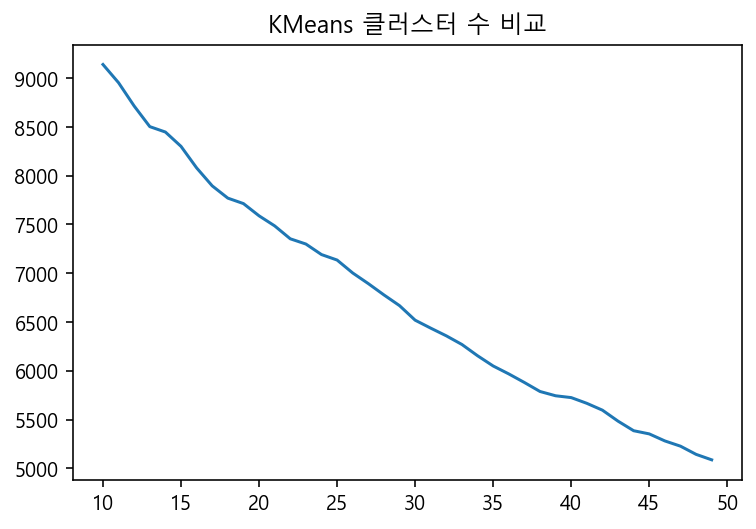

In [33]:
plt.plot(range(start,end), inertia)
plt.title("KMeans 클러스터 수 비교")

In [34]:
n_clusters = 100 # 값을 바꿔가며 실행해 본다

cls = KMeans(n_clusters = n_clusters, random_state=42)
cls.fit(feature_vector)
predict = cls.predict(feature_vector)
df["cluster"] = predict

In [35]:
df["cluster"].value_counts().head(10)

1     1543
81      59
18      44
17      43
11      33
13      31
2       29
3       29
34      28
25      26
Name: cluster, dtype: int64

In [36]:
from sklearn.cluster import MiniBatchKMeans
b_inertia = []

for i in trange(start,end):
    cls = MiniBatchKMeans(n_clusters=i, random_state=42)
    cls.fit(feature_vector)
    b_inertia.append(cls.inertia_)

100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:08<00:00,  4.80it/s]


Text(0.5, 1.0, 'MiniBatchKMeans 클러스터 수 비교')

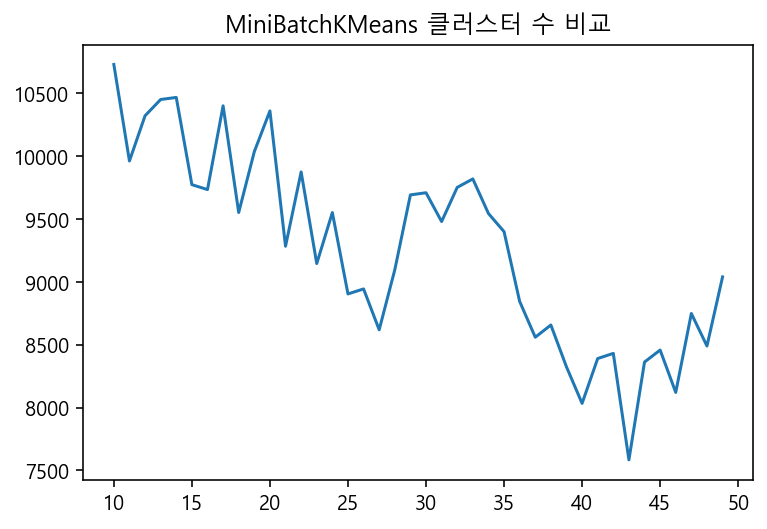

In [37]:
plt.plot(range(start,end), b_inertia)
plt.title("MiniBatchKMeans 클러스터 수 비교")

In [38]:
cls = MiniBatchKMeans(n_clusters = n_clusters, random_state=42)
cls.fit(feature_vector)
predict = cls.predict(feature_vector)
df["bcluster"] = predict

In [39]:
df["cluster"].value_counts().

SyntaxError: invalid syntax (<ipython-input-39-cd510c287697>, line 1)

In [40]:
df[df["bcluster"] == 19].head(5)

,text,origin_text,course,머신러닝,딥러닝,파이썬,판다스,공공데이터,django,크롤링,...,웹개발,엑셀,c,자바,자바스크립트,node,vue,리액트,cluster,bcluster
262,인문게 졸업생인데 공학 계열로 진로를 변경하려 합니다. 인프런에서 '모두를 위한 딥...,인문게 졸업생인데 공학 계열로 진로를 변경하려 합니다. 인프런에서 '모두를 위한 딥...,인문게 졸업생인데 공학 계열로 진로를 변경하려 합니다. 인프런에서 '모두를 위한 딥...,True,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,41,19
335,딥러닝에 관심이 생겨 구글링 중 인프런에 좋은 강의를 발견했습니다. \n열심히 ai...,딥러닝에 관심이 생겨 구글링 중 인프런에 좋은 강의를 발견했습니다. \n열심히 ai...,모두를 위한 딥러닝 - 기본적인 머신러닝과 딥러닝 강좌,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,41,19
1521,"2020년에는 어설프게 알고 있는 딥러닝 분야에 대해서 깊이를 다지는 것이고, 관심...","2020년에는 어설프게 알고 있는 딥러닝 분야에 대해서 깊이를 다지는 것이고, 관심...","2020년에는 어설프게 알고 있는 딥러닝 분야에 대해서 깊이를 다지는 것이고, 관심...",True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,41,19
1699,지금까지 웹개발을 목표로 공부해 왔지만 올해는 빅데이터 및 딥러닝 관련해서 개발자로...,지금까지 웹개발을 목표로 공부해 왔지만 올해는 빅데이터 및 딥러닝 관련해서 개발자로...,지금까지 웹개발을 목표로 공부해 왔지만 올해는 빅데이터 및 딥러닝 관련해서 개발자로...,True,True,True,False,False,False,False,...,True,False,False,False,False,False,False,False,41,19
1819,올해는 ai 머신러닝을 제대로 학습하고 싶습니다.\n더불어 프론트앤드 개발쪽도 더 ...,올해는 AI 머신러닝을 제대로 학습하고 싶습니다.\n더불어 프론트앤드 개발쪽도 더 ...,"는 ""모두를 위한 딥러닝 - 기본적인 머신러닝과 딥러닝 강좌"" ""모두를 위한 딥러...",True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,41,19


In [41]:
df.loc[df["bcluster"] == 92, ["bcluster", "cluster", "course"]].head()

,bcluster,cluster,course
134,92,1,node.js로 웹 크롤링하기
407,92,1,node.js로 웹 크롤링하기
450,92,1,"node.js로 웹 크롤링하기, node.js교과서 - 기본부터 프로젝트 실습까지..."
637,92,1,"node.js로 웹 크롤링하기, 따라하며 배우는 노드, 리액트 시리즈 - 유튜브..."
1076,92,1,"리액트 네이티브 투두앱 만들기, node.js로 웹 크롤링하기"


In [43]:
# https://github.com/amueller/word_cloud
# pip install wordcloud

from wordcloud import WordCloud

stopwords = ["관심 강의", "관심강의", "관심", "강의", "강좌", 
             "강의를", "올해", "올해는", "열심히", "공부를", 
             "합니다", "하고", "싶어요", "있는", "있습니다", 
             "싶습니다", "2020년", "배우는", "완벽", "만들기", 
             "실전", "창의적", "문제해결", "관심이", "다양한", 
             "방법", "홍정모의", "따라하며", "배우는", "완벽", 
             "가이드", "공부", "만들기", "실전", "실전활용", 
             "개념과활용", "실전스프링", "관련", "관심있는", 
             "개념과활용", "관심있는인프런"]

#stopwords = []

def displayWordCloud(data=None, backgroundcolor='white', width=1280, height=768):
    wordcloud = WordCloud(
#        font_path = '/Library/Fonts/NanumBarunGothic.ttf',
        font_path = 'C:/Windows/Fonts/malgun.ttf',
        stopwords = stopwords,
        background_color = backgroundcolor,
        width = width, height=height
    ).generate(data)
    plt.figure(figsize=(15,10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

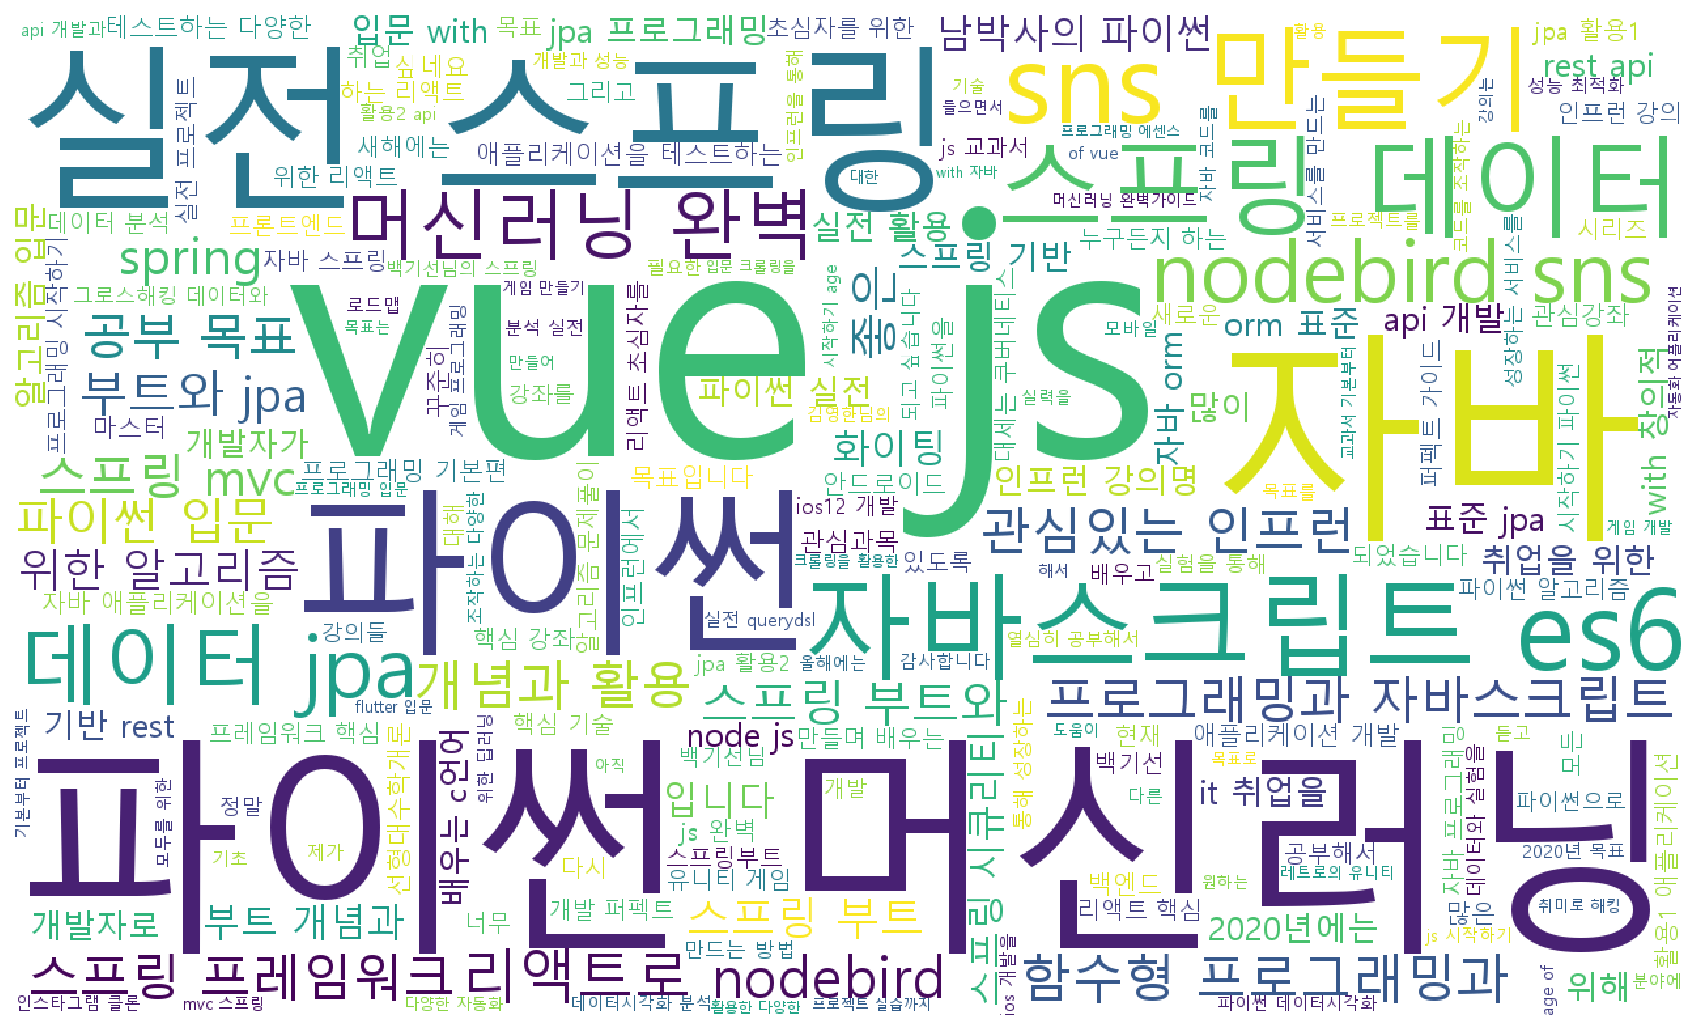

In [44]:
course_text = " ".join(df["course"])
displayWordCloud(course_text)